<a href="https://colab.research.google.com/github/raheelsiddiqi2013/fruit-grading/blob/main/Dragon_Fruit_Maturity_Detection_Second_Notebook_VGG16_Frozen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dragon Fruit Maturity Detection using VGG16 Pre-Trained Model
This notebook is written and executed by **Raheel Siddiqi, PhD**. Dragon fruit maturity detection is performed in this notebook. It is a binary classification problem and the two classes are _"Immature Dragon Fruit"_ and _"Mature Dragon Fruit"_. In total, there are **2,127 images** in the dataset and the dataset has a train-validation-test split of **70-15-15**. The train set contains **1489 images**, the test and validation sets contain **319 images**, respectively. The pre-trained **VGG16 model** is used for feature extraction, while a **densely connected network** is used for final classification. A test set classification accuracy of **90.5%** has been achieved. This notebook was executed using **Google Colab** and **T4 GPU** as the hardware accelerator.  

## TensorFlow Version

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## Connecting to the Dataset

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!ls "/content/drive/MyDrive/Datasets"

DragonFruitMaturityDetectionDatasetSorted  DragonFruitMaturityDetectionDatasetSorted.zip


## Importing Essential Libraries

In [4]:
# Import
import numpy as np
from PIL import Image
import os

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16

## Initializing the Feature Extractor
The feature extractor based on VGG16 is initialized here. All layers of the feature extractor are kept frozen.

In [5]:
vgg16 = VGG16(weights='imagenet', include_top = False, pooling = "avg")
for layer in vgg16.layers:
            layer.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


## Loading Dataset

In [6]:
# Create Generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2
                                   )

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


# Create Data Loaders
train_loader = train_datagen.flow_from_directory(
    directory = "/content/drive/MyDrive/Datasets/DragonFruitMaturityDetectionDatasetSorted/Train",
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True
)

validation_loader= validation_datagen.flow_from_directory(
    directory = "/content/drive/MyDrive/Datasets/DragonFruitMaturityDetectionDatasetSorted/Validation",
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True
)

test_loader = test_datagen.flow_from_directory(
    directory = "/content/drive/MyDrive/Datasets/DragonFruitMaturityDetectionDatasetSorted/Test",
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True
)

Found 1489 images belonging to 2 classes.
Found 319 images belonging to 2 classes.
Found 319 images belonging to 2 classes.


## Dataset Classes

In [7]:
train_loader.class_indices

{'ImmatureDragonFruit': 0, 'MatureDragonFruit': 1}

## Model Compilation
The model is compiled using **categorical cross entropy** as the loss function and **Adam** as the optimizer with learning rate of **0.0001**.

In [8]:
from keras.callbacks import ModelCheckpoint
import keras

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model1 = Sequential()
model1.add(vgg16)
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(2, activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['categorical_accuracy'])
model1.summary()

filepath="Dragon_Fruit_VGG16_best_model2.keras"
checkpoint = ModelCheckpoint(filepath, monitor="val_loss", save_best_only=True)
callbacks_list = [checkpoint]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 14780610 (56.38 MB)
Trainable params: 65922 (257.51 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


## Model Training
The model is trained for 10 epochs.

In [9]:
import math

model1_train_history = model1.fit_generator(
    generator = train_loader,
    steps_per_epoch = math.ceil(1489//32),
    epochs = 10,
    callbacks=callbacks_list,
    validation_data = validation_loader,
    validation_steps = math.ceil(319//32)
)

<ipython-input-9-6eaef674c1e2>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model1_train_history = model1.fit_generator(


Epoch 1/10
46/46 [==============================] - 788s 17s/step - loss: 0.6019 - categorical_accuracy: 0.6548 - val_loss: 0.5296 - val_categorical_accuracy: 0.7743
Epoch 2/10
46/46 [==============================] - 32s 691ms/step - loss: 0.5089 - categorical_accuracy: 0.8140 - val_loss: 0.4491 - val_categorical_accuracy: 0.8368
Epoch 3/10
46/46 [==============================] - 38s 829ms/step - loss: 0.4378 - categorical_accuracy: 0.8737 - val_loss: 0.3915 - val_categorical_accuracy: 0.8576
Epoch 4/10
46/46 [==============================] - 32s 689ms/step - loss: 0.3985 - categorical_accuracy: 0.8634 - val_loss: 0.3395 - val_categorical_accuracy: 0.8507
Epoch 5/10
46/46 [==============================] - 35s 752ms/step - loss: 0.3561 - categorical_accuracy: 0.8806 - val_loss: 0.3137 - val_categorical_accuracy: 0.8576
Epoch 6/10
46/46 [==============================] - 36s 776ms/step - loss: 0.3330 - categorical_accuracy: 0.8861 - val_loss: 0.3039 - val_categorical_accuracy: 0.8715

## Visualization of the Training Process


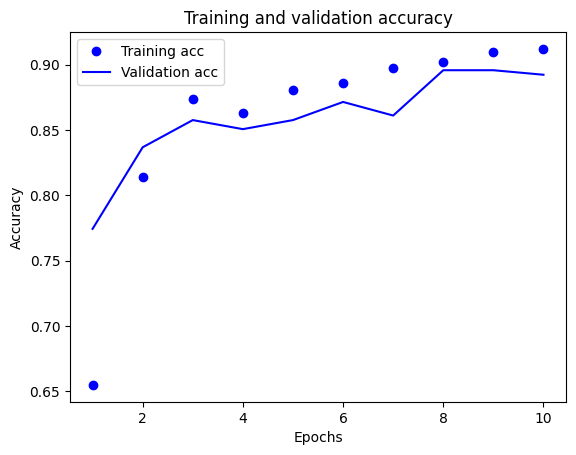

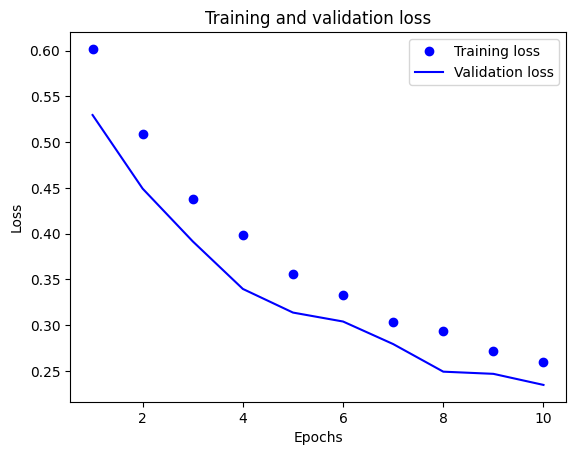

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=model1_train_history.history['categorical_accuracy']
val_acc=model1_train_history.history['val_categorical_accuracy']
loss=model1_train_history.history['loss']
val_loss=model1_train_history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model Evaluation
First, test data is loaded.

In [11]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.keras.utils import to_categorical
import cv2

immature_cases_dir = Path('/content/drive/MyDrive/Datasets/DragonFruitMaturityDetectionDatasetSorted/Test/ImmatureDragonFruit')
mature_cases_dir = Path('/content/drive/MyDrive/Datasets/DragonFruitMaturityDetectionDatasetSorted/Test/MatureDragonFruit')

immature_cases = immature_cases_dir.glob('*.jpg')
mature_cases = mature_cases_dir.glob('*.jpg')

image_width=224
image_height=224

test_data = []
test_labels = []

for img in immature_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (image_width,image_height))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)

for img in mature_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (image_width,image_height))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (319, 224, 224, 3)
Total number of labels: (319, 1)


Then, the best model is loaded.

In [12]:
from keras.models import load_model
best_model_VGG16 = load_model('Dragon_Fruit_VGG16_best_model2.keras')

### Confusion Matrix of the Model's Performance

In [13]:
# Get predictions
preds = best_model_VGG16.predict(test_data, batch_size=32)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(319,1))

10/10 [==============================] - 8s 896ms/step


<Figure size 640x480 with 0 Axes>

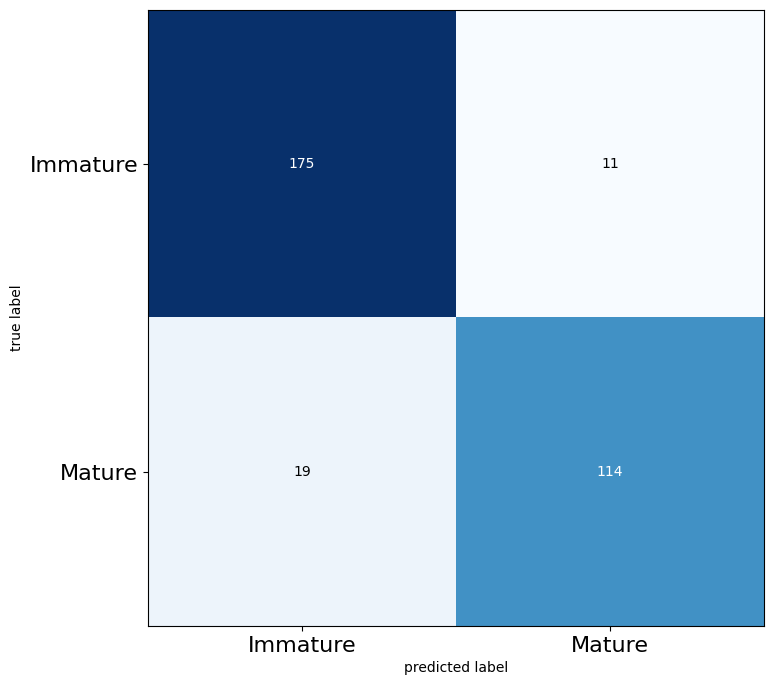

In [14]:
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Immature','Mature'], fontsize=16)
plt.yticks(range(2), ['Immature','Mature'], fontsize=16)
plt.show()

### Model's Test Set Accuracy

In [15]:
# Evaluation on test dataset

test_loss, test_score = best_model_VGG16.evaluate(test_data, test_labels_one_hot_encoding, batch_size=16)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

20/20 [==============================] - 10s 290ms/step - loss: 0.2499 - categorical_accuracy: 0.9060
Loss on test set:  0.24994200468063354
Accuracy on test set:  0.9059560894966125


### Model's Sensitivity (recall), Specificity and Precision

In [16]:
# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity=tn/(tn+fp)

print("Sensitivity (Recall) of the model is {:.3f}".format(recall))
print("Specificity of the model is {:.3f}".format(specificity))
print("Precision of the model is {:.3f}".format(precision))

Sensitivity (Recall) of the model is 0.857
Specificity of the model is 0.941
Precision of the model is 0.912


### Model's ROC Curve and AUC
**Receiver operating characteristic** curve (a.k.a ROC) is a graphic plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The critical point here is "binary classifier" and "varying threshold". **Area Under the Curve** (a.k.a. AUC) is the percentage of the area that is under this ROC curve, ranging between 0 and 1. ROC is a great way to visualize the performance of a binary classifier, and AUC is one single number to summarize a classifier's performance. The higher the AUC is, the better the classifier.

In [17]:
from sklearn.metrics import roc_curve

predict_x = best_model_VGG16.predict(test_data)
preds = np.argmax(predict_x,axis=1)
fpr, tpr, thresholds = roc_curve(test_labels.ravel(), preds)

10/10 [==============================] - 1s 143ms/step


In [18]:
from sklearn.metrics import auc
auc_var = auc(fpr, tpr)

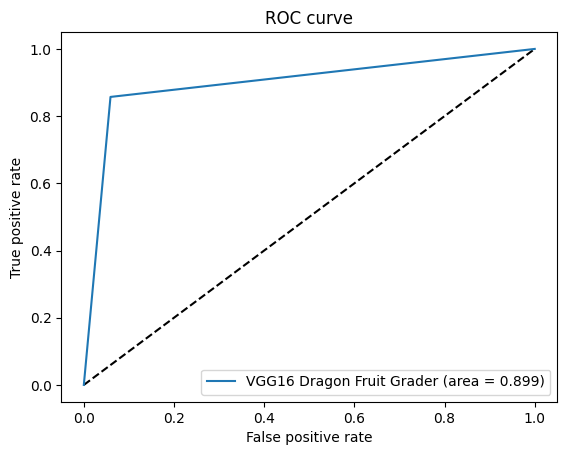

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='VGG16 Dragon Fruit Grader (area = {:.3f})'.format(auc_var))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### Model's Precision-Recall Curve

In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

In [21]:
precision, recall, thresholds = precision_recall_curve(test_labels.ravel(), preds)

In [22]:
auc_var2 = auc(recall, precision)

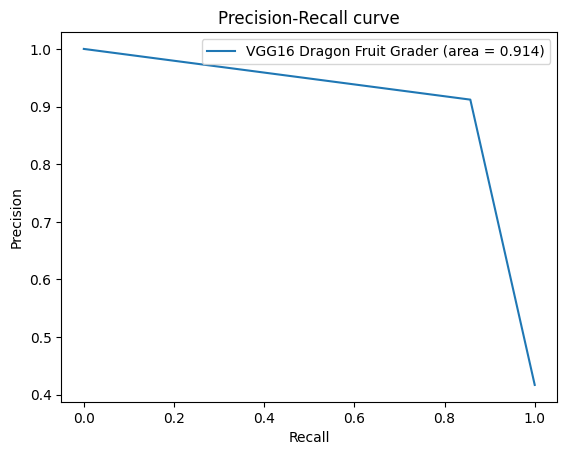

In [23]:
plt.figure()
plt.plot(recall, precision, label='VGG16 Dragon Fruit Grader (area = {:.3f})'.format(auc_var2))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.show()

### Model's Average Precision Score and F1 Score

In [24]:
print('Average Precision Score: {:.3f}'.format(average_precision_score(test_labels.ravel(), preds)))

Average Precision Score: 0.841


In [25]:
print("F1 Score: {:.3f}".format(f1_score(test_labels.ravel(),predicted_labels.ravel())))

F1 Score: 0.884
